In [ ]:
import numpy as np
import pandas as pd
import gdown
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown 16CKU_3fwCFvwED95u_2fIyFLKTp4S6QR

Downloading...
From: https://drive.google.com/uc?id=16CKU_3fwCFvwED95u_2fIyFLKTp4S6QR
To: /content/bike_sharing.txt
100% 648k/648k [00:00<00:00, 124MB/s]


In [ ]:
data = pd.read_csv("bike_sharing.txt")
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


# **Exploratory data analysis**

# 1. checking summary of the dataset

In [ ]:
data.shape

(10886, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
data['datetime']=pd.to_datetime(data['datetime'])
data['season']=data['season'].astype('category')
data['holiday']=data['holiday'].astype('category')
data['workingday']=data['workingday'].astype('category')
data['weather']=data['weather'].astype('category')

In [ ]:
data.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [ ]:
data.describe()

,datetime,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


# 2. Checking null values

In [ ]:
data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

# 3. Checking duplicate values

In [ ]:
data.duplicated().sum()

0

# 4. Analysis of numerical and categorical variables

In [ ]:
df_num = data.select_dtypes(include=np.number)
df_num.columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'count'],
      dtype='object')

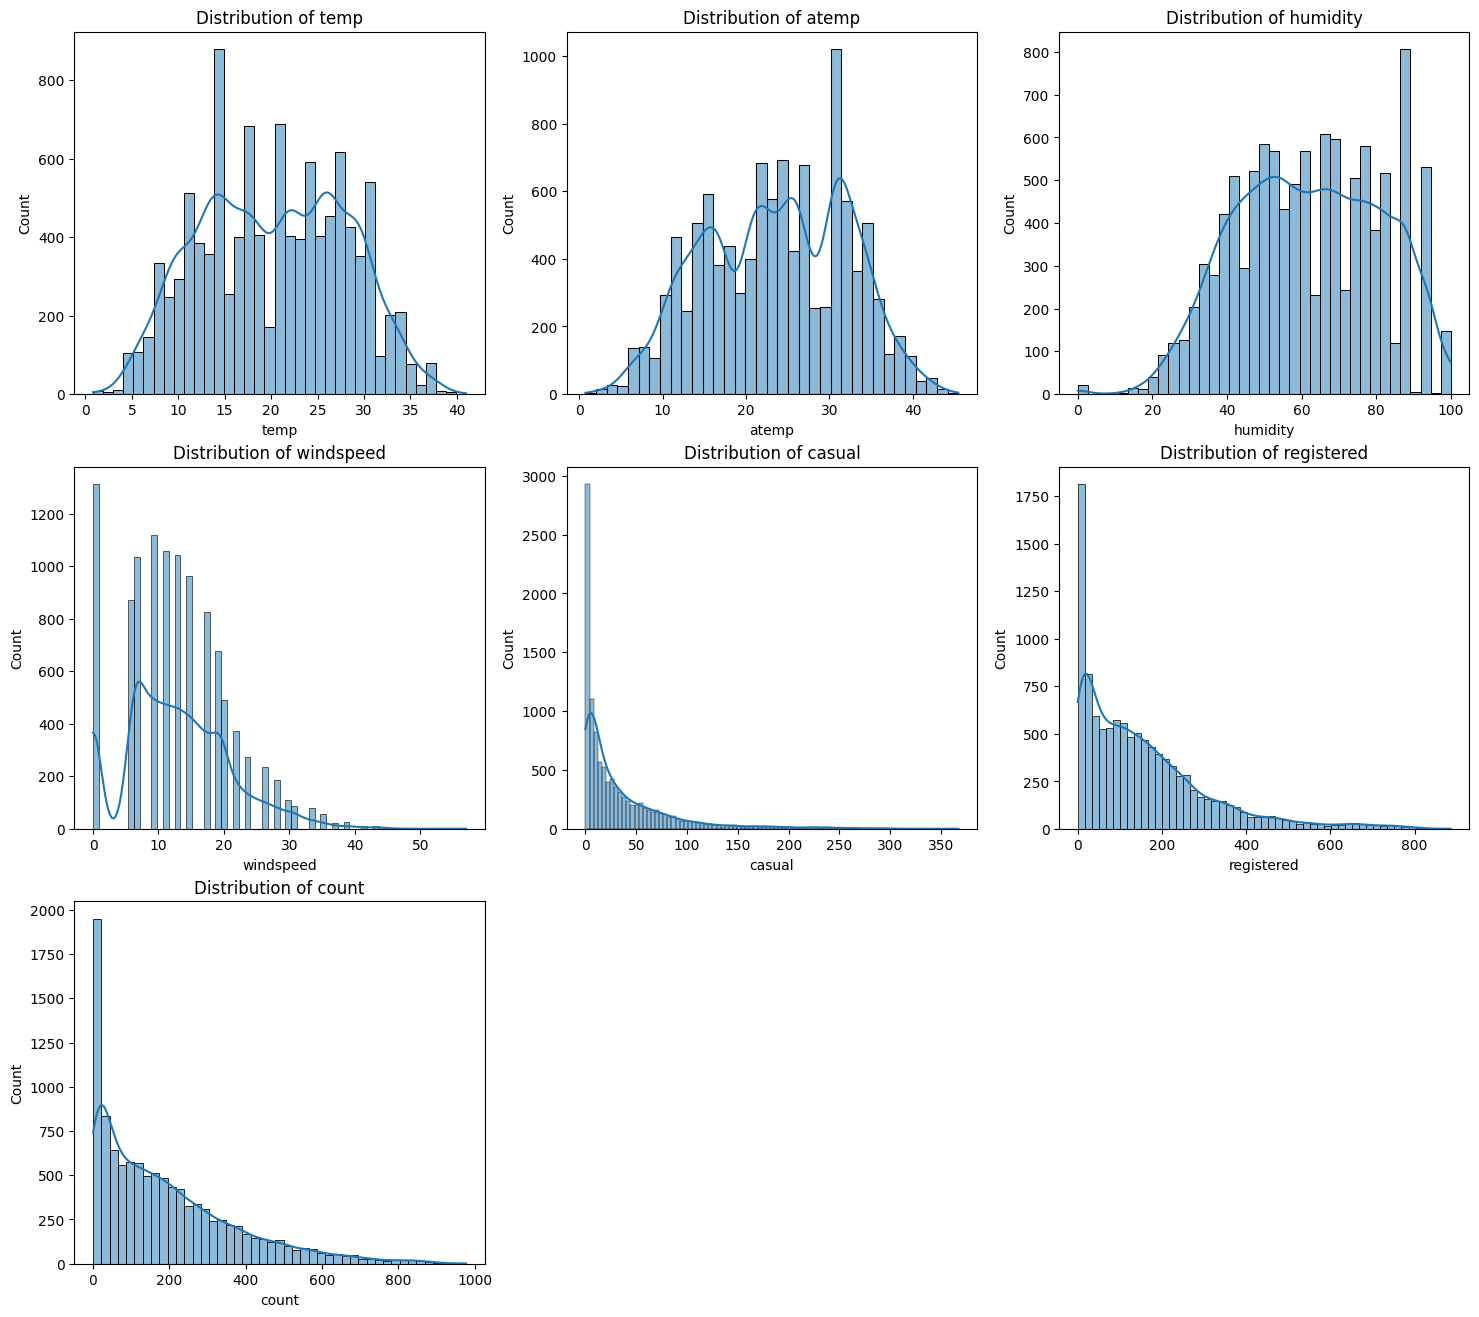

In [ ]:
plt.figure(figsize=(18,16))
x=1
for col in df_num.columns:
  plt.subplot(3,3,x)
  plt.title(f"Distribution of {col}")
  sns.histplot(data=df_num, x=df_num[col], kde=True)
  plt.plot()
  x+=1

In [ ]:
df_cat = data.select_dtypes(include = 'category')
df_cat.columns

Index(['season', 'holiday', 'workingday', 'weather'], dtype='object')

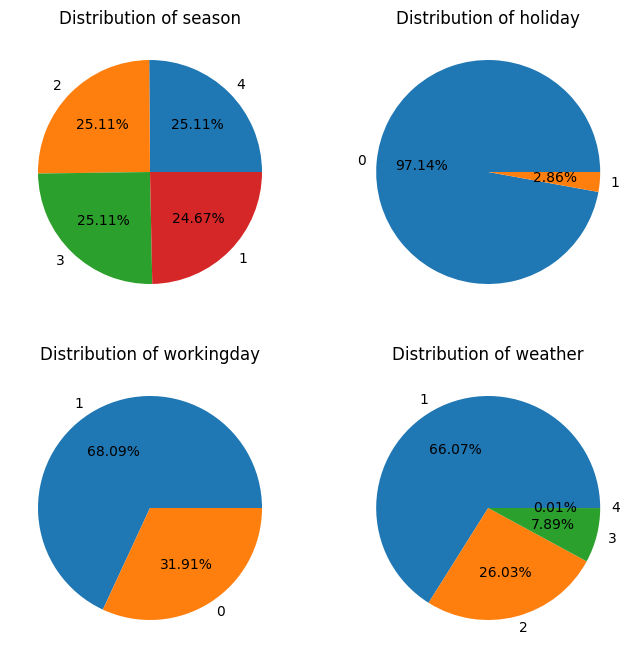

In [ ]:
plt.figure(figsize=(8,8))
x=1
for col in df_cat:
  plt.subplot(2,2,x)
  plt.title(f"Distribution of {col}")
  temp = df_cat[col].value_counts()
  size = temp.values
  label = temp.index
  plt.pie(x=size, labels=label, autopct="%.2f%%")
  plt.plot()
  x+=1

# 5. Checking for the outliers and removing them

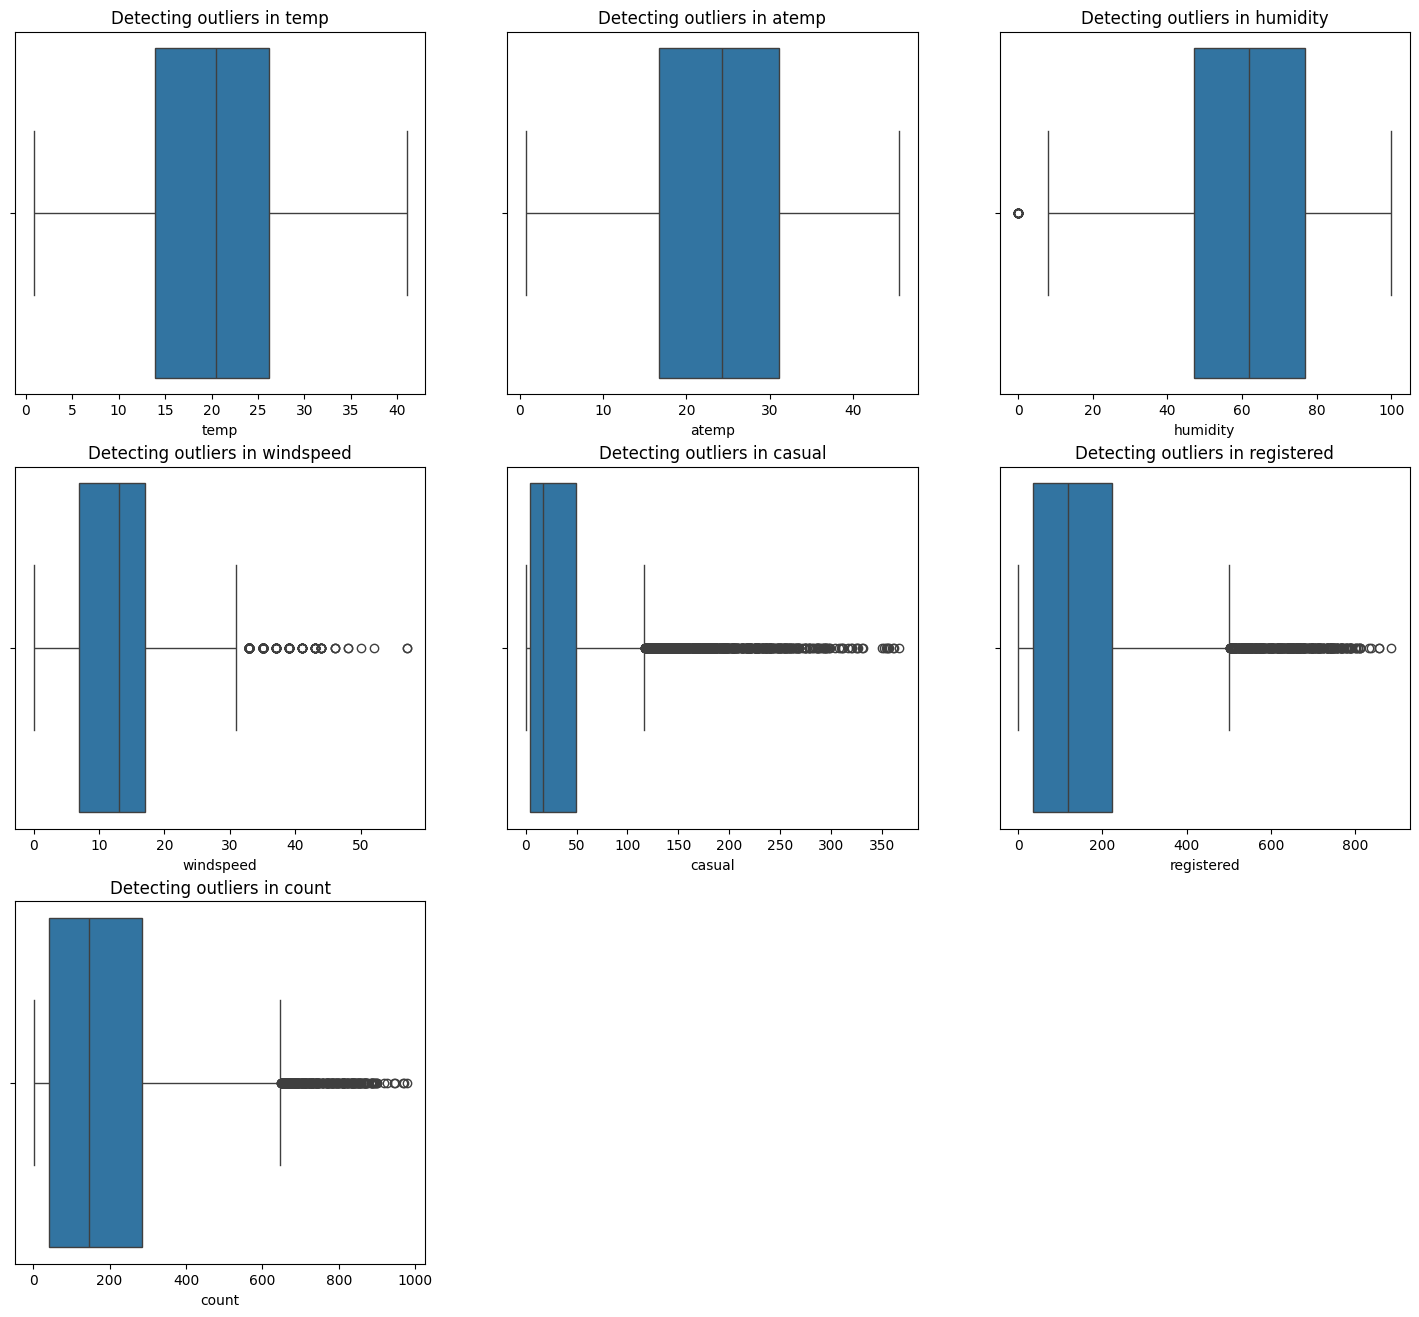

In [ ]:
plt.figure(figsize=(18,16))
x=1
for col in df_num.columns:
  plt.subplot(3,3,x)
  plt.title(f"Detecting outliers in {col}")
  sns.boxplot(data=df_num, x=df_num[col])
  plt.plot()
  x+=1

## **Insight -**
### we dont have outliers in temp and atemp variable, while other columns have outliers

### Removing outliers in humidity

In [ ]:
q1=data['humidity'].quantile(0.25)
q3=data['humidity'].quantile(0.75)
iqr=q3-q1
min_h=q1-1.5*iqr
max_h=q3+1.5*iqr
min_h, max_h

(2.0, 122.0)

In [ ]:
num_outliers=len(data[(data['humidity']<min_h) | (data['humidity']>max_h)])
num_outliers/len(data)*100

0.20209443321697593

## **Insights -**
### in humidity variable we have 0.2% outliers

In [ ]:
data_h = data[~(data['humidity']<min_h) | (data['humidity']>max_h)]
data_h

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


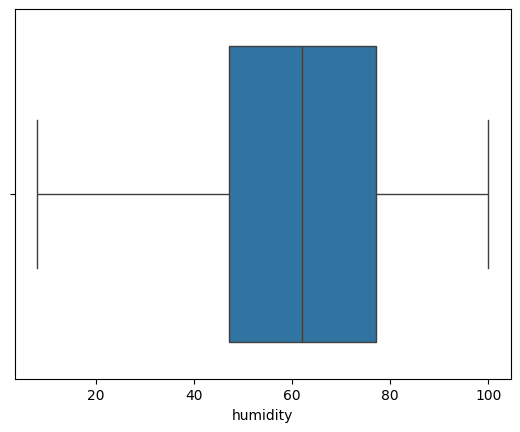

In [ ]:
b = sns.boxplot(data=data_h, x=data_h['humidity'])

### detecting outliers in windspeed

<Axes: xlabel='windspeed'>

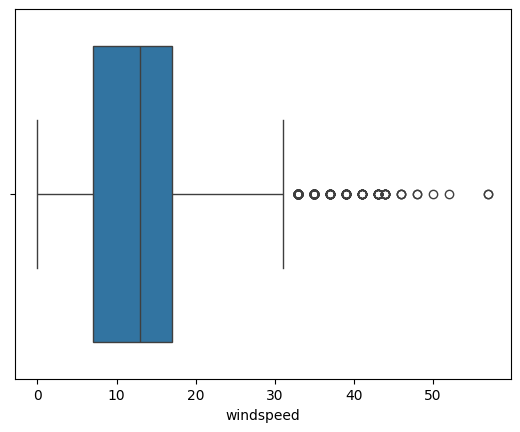

In [ ]:
sns.boxplot(data=data_h, x=data_h['windspeed'])

### Removing outliers in windspeed

In [ ]:
q1=data_h['windspeed'].quantile(0.25)
q3=data_h['windspeed'].quantile(0.75)
iqr=q3-q1
min_w=q1-1.5*iqr
max_w=q3+1.5*iqr
min_w, max_w

(-7.993100000000002, 31.992500000000003)

In [ ]:
w=data['windspeed'].quantile(0.97)
w

30.0026

In [ ]:
num_outliers=len(data_h[(data_h['windspeed']>w)])
num_outliers/len(data_h)*100

2.899484536082474

## **Insights -**
### in windspeed variable we have approx 3% outliers - so removing the data above 97% to get rid of outliers

In [ ]:
data_w=data_h[data_h['windspeed']<=w]
data_w

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


<Axes: xlabel='windspeed'>

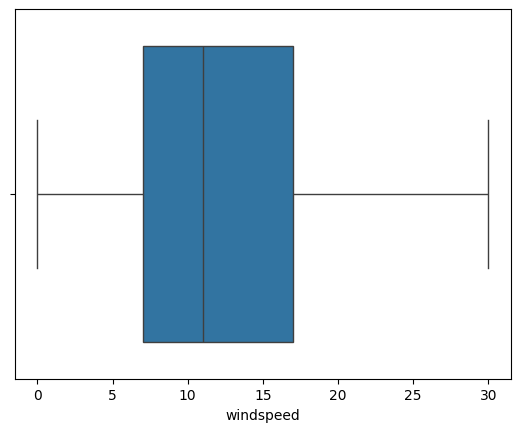

In [ ]:
sns.boxplot(data=data_w, x=data_w['windspeed'])

### detecting outliers in casual variable

<Axes: xlabel='casual'>

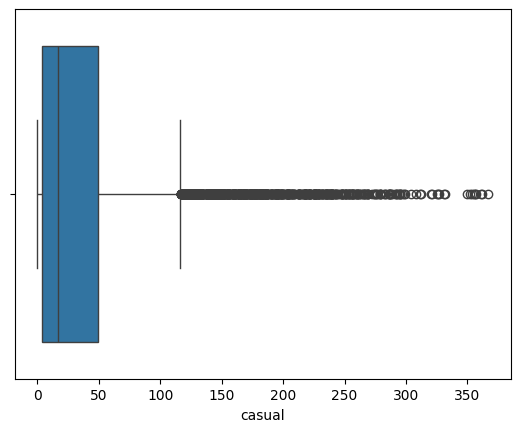

In [ ]:
sns.boxplot(data=data_w, x=data_w['casual'])

In [ ]:
q1=data_w['casual'].quantile(0.25)
q3=data_w['casual'].quantile(0.75)
iqr=q3-q1
min_c=q1-1.5*iqr
max_c=q3+1.5*iqr
min_c, max_c

(-63.5, 116.5)

In [ ]:
c=data_w['casual'].quantile(0.83)
c

68.0

In [ ]:
num_outliers=len(data_w[(data_w['casual']>c)])
num_outliers/len(data_w)*100

16.712484595696274

## **Insights -**
### in casual variable we have approx 17% outliers - so removing the data above 83% to get rid of outliers

In [ ]:
data_c=data_w[data_w['casual']<=c]
data_c

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


<Axes: xlabel='casual'>

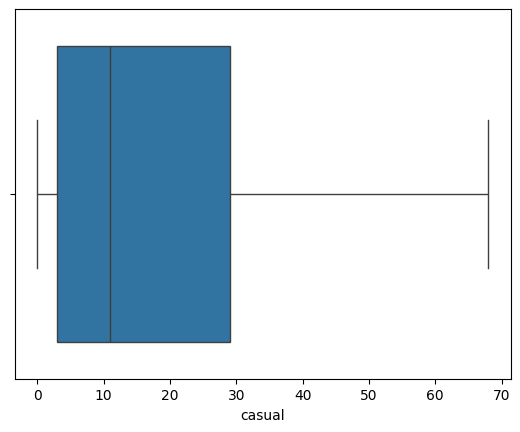

In [ ]:
sns.boxplot(data=data_c, x=data_c['casual'])

### detecting outliers in registered variable

<Axes: xlabel='registered'>

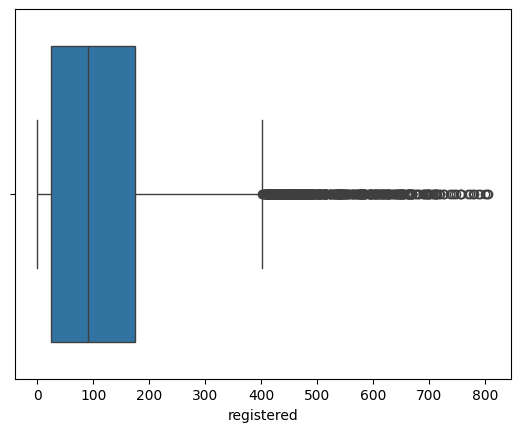

In [ ]:
sns.boxplot(data=data_c, x=data_c['registered'])

In [ ]:
r=data_c['registered'].quantile(0.92)
r

336.0

In [ ]:
num_outliers=len(data_c[(data_c['registered']>r)])
num_outliers/len(data_c)*100

7.989984065558843

## **Insights -**
### in registered variable we have approx 7% outliers - so removing the data above 92% to get rid of outliers

In [ ]:
data_r = data_c[data_c['registered']<=r]
data_r

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


<Axes: xlabel='registered'>

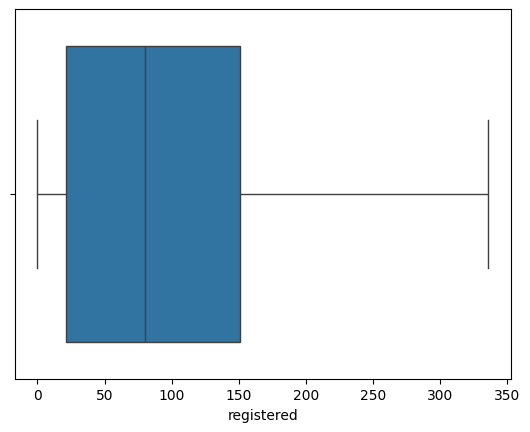

In [ ]:
sns.boxplot(data=data_r, x=data_r['registered'])

<Axes: xlabel='count'>

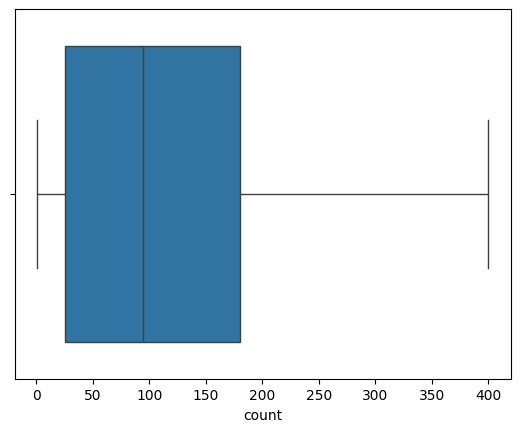

In [ ]:
sns.boxplot(data=data_r, x=data_r['count'])

In [ ]:
data_r

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


### data_r is the final dataset that have no outliers

In [ ]:
data_r_num=data_r.select_dtypes(include=np.number)
data_r_num.columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'count'],
      dtype='object')

count    8084.000000
mean       16.684191
std        17.925398
min         0.000000
25%         2.000000
50%         9.000000
75%        27.000000
max        68.000000
Name: casual, dtype: float64


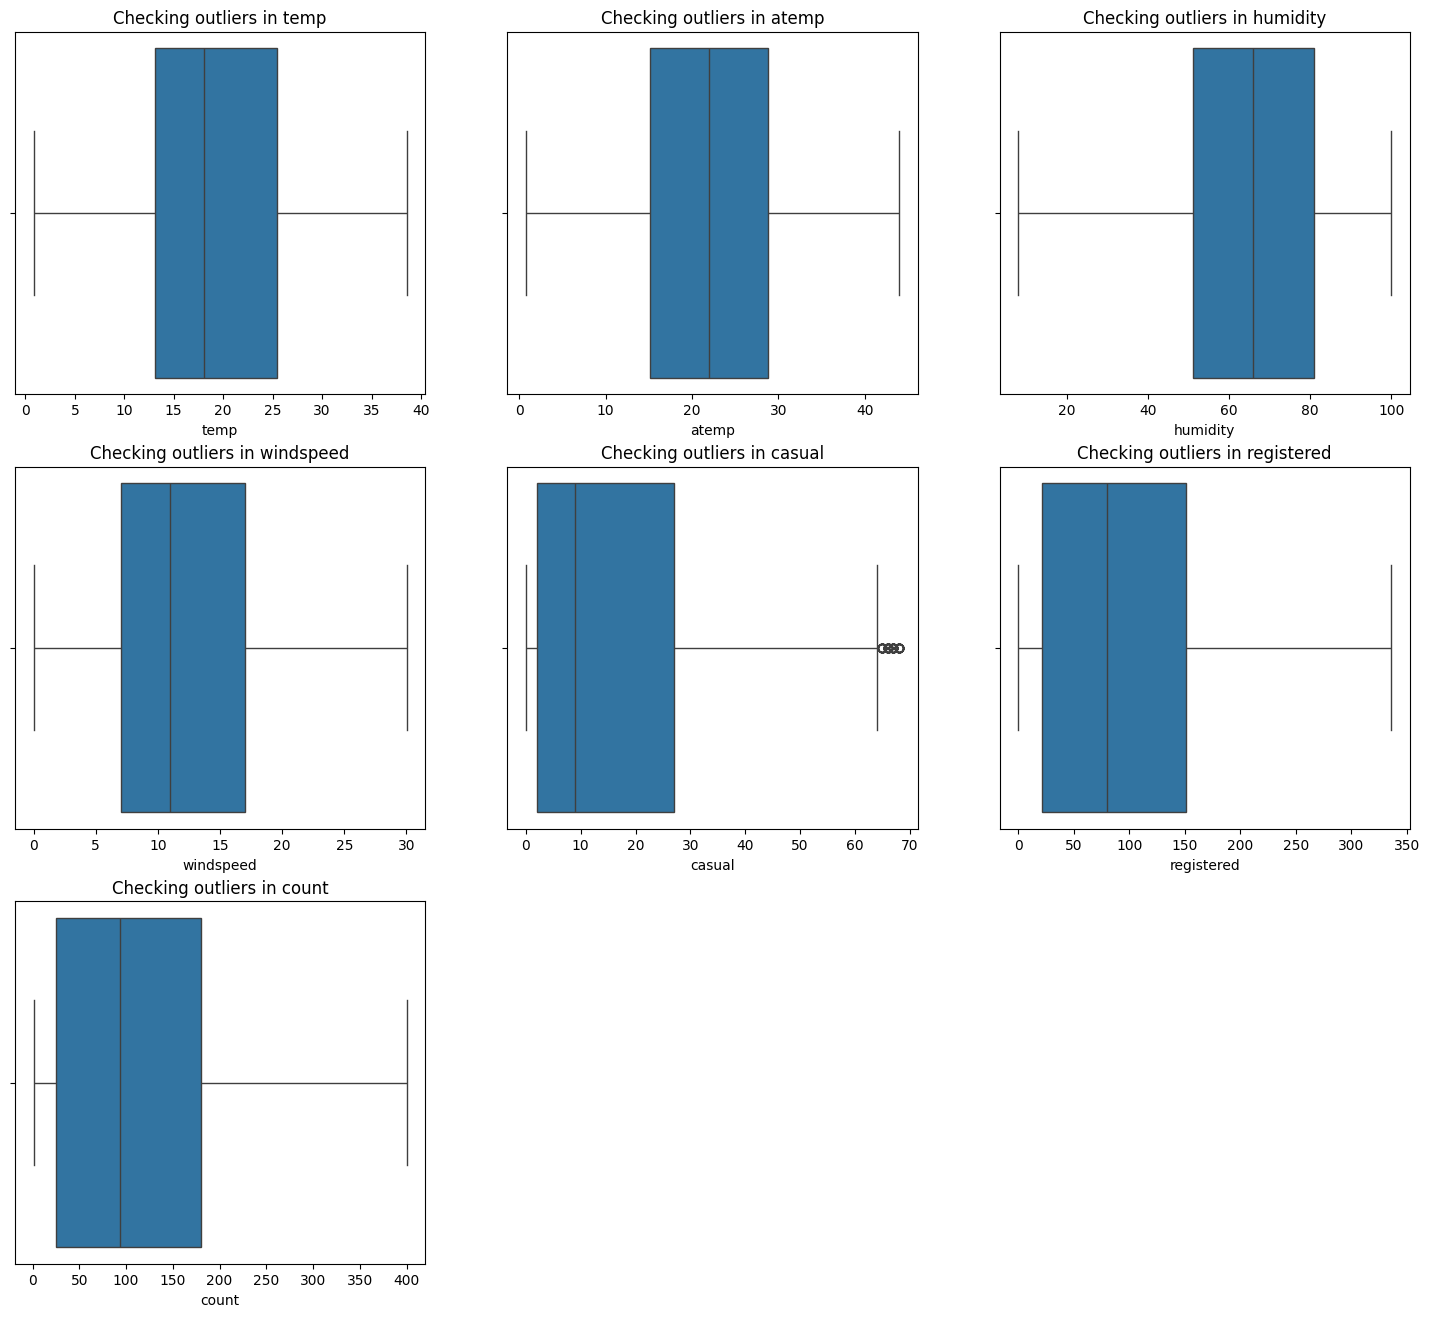

In [ ]:
plt.figure(figsize=(18,16))
x=1
for col in data_r_num.columns:
  if col=='casual':
    print(data_r_num[col].describe())
  plt.subplot(3,3,x)
  plt.title(f"Checking outliers in {col}")
  sns.boxplot(data=data_r_num, x=data_r_num[col])
  plt.plot()
  x+=1

# **Relationship between dependent and independent variables**

# 1. Plotting correlation heatmap to get the relationship between dependent and independent variables

In [ ]:
corr_data = data_r.corr()
corr_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,1.000000,0.493453,0.001358,-0.022056,0.022198,0.155345,0.157962,0.097578,-0.094886,0.092095,0.194307,0.186578
season,0.493453,1.000000,0.001687,-0.000670,0.013563,0.279899,0.284284,0.216513,-0.121467,0.122441,0.137778,0.142948
holiday,0.001358,0.001687,1.000000,-0.259687,-0.014712,-0.037127,-0.044101,-0.008743,0.025888,-0.015802,-0.035040,-0.033496
workingday,-0.022056,-0.000670,-0.259687,1.000000,0.022261,0.126082,0.123610,-0.074068,0.030461,-0.033389,0.182893,0.153235
weather,0.022198,0.013563,-0.014712,0.022261,1.000000,-0.005766,-0.009977,0.420295,0.030015,-0.104981,-0.062540,-0.074095
temp,0.155345,0.279899,-0.037127,0.126082,-0.005766,1.000000,0.988985,0.077755,-0.031205,0.484684,0.211306,0.274577
atemp,0.157962,0.284284,-0.044101,0.123610,-0.009977,0.988985,1.000000,0.089809,-0.076028,0.484169,0.210892,0.274120
humidity,0.097578,0.216513,-0.008743,-0.074068,0.420295,0.077755,0.089809,1.000000,-0.300813,-0.285834,-0.252424,-0.273361
windspeed,-0.094886,-0.121467,0.025888,0.030461,0.030015,-0.031205,-0.076028,-0.300813,1.000000,0.108581,0.110757,0.116805
casual,0.092095,0.122441,-0.015802,-0.033389,-0.104981,0.484684,0.484169,-0.285834,0.108581,1.000000,0.630994,0.736547


<Axes: >

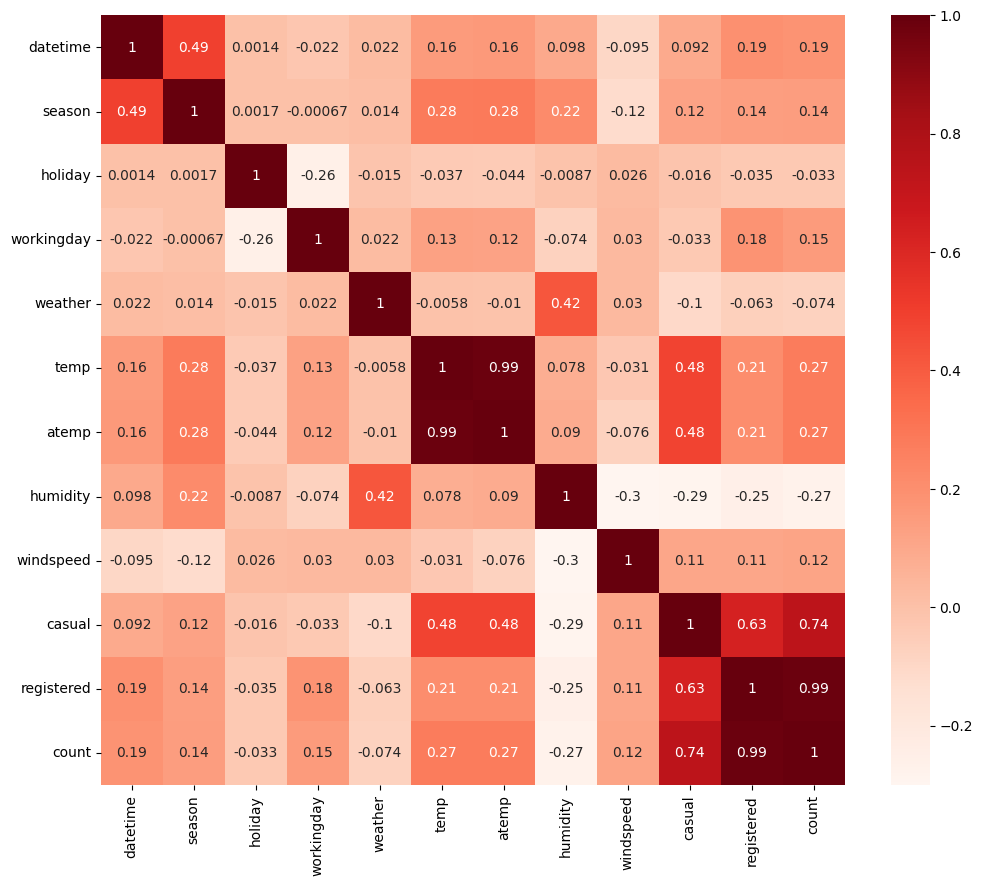

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data=corr_data, cmap='Reds', annot=True)

### variable temp and atemp are highly correlated, we can remove atemp

In [ ]:
data_r.drop(columns='atemp')

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,61,6.0032,12,117,129


# **Number of bike rides on weekdays and weekends**

Ho: Number of bike rides on weekdays is same as number of bike rides on weekends


Ha: There is a significant difference between the number of bike rides on weekdays and weekends

In [ ]:
data_r['workingday'].value_counts()

workingday
1    5769
0    2315
Name: count, dtype: int64

In [ ]:
data_r.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [ ]:
data_r['workingday']=data['workingday'].astype('int')

<ipython-input-237-96a8df50976f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_r['workingday']=data['workingday'].astype('int')


In [ ]:
data_r.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday             int64
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [ ]:
weekdays=data_r[data_r['workingday']==1]['count']
weekends=data_r[data_r['workingday']==0]['count']

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
ttest_ind(weekdays, weekends, alternative='two-sided')

TtestResult(statistic=13.940469598919615, pvalue=1.148935078855655e-43, df=8082.0)

### alpha=0.05, pvalue=1.148935078855655e-43
### p_value<alpha, we reject null hypothesis
### Hence there is a significant difference between the number of bike rides on weekdays and weekends

## **Insights -**
### As the hypothesis shows that, bike rides are less during weekends because of office/school holiday

## **Recommendations -**
### Yulu can start some physical activity to gather the people and aware them about the sustainable future and reduce carbon emission, for short distance people can afford bikes rather that taxi and cabs

# **Demand of bicycles on rent based on different weather conditions**

Ho: Demand of bicylces on rent is the same for different weather conditions

Ha: Demand of bicylces on rent is not the same for different weather conditions

In [ ]:
data_r['weather'].value_counts()

weather
1    5144
2    2221
3     718
4       1
Name: count, dtype: int64

As there's only 1 datapoint in weather 4 we will not consider weather 4

In [ ]:
data_r['weather'] = data_r['weather'].astype('int')

<ipython-input-243-f9e3cfc37b12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_r['weather'] = data_r['weather'].astype('int')


In [ ]:
data_r.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

### checking the normal distribution using histplot

In [ ]:
w1 = data_r[data_r['weather']==1]
w2 = data_r[data_r['weather']==2]
w3 = data_r[data_r['weather']==3]

In [ ]:
from scipy.stats import probplot

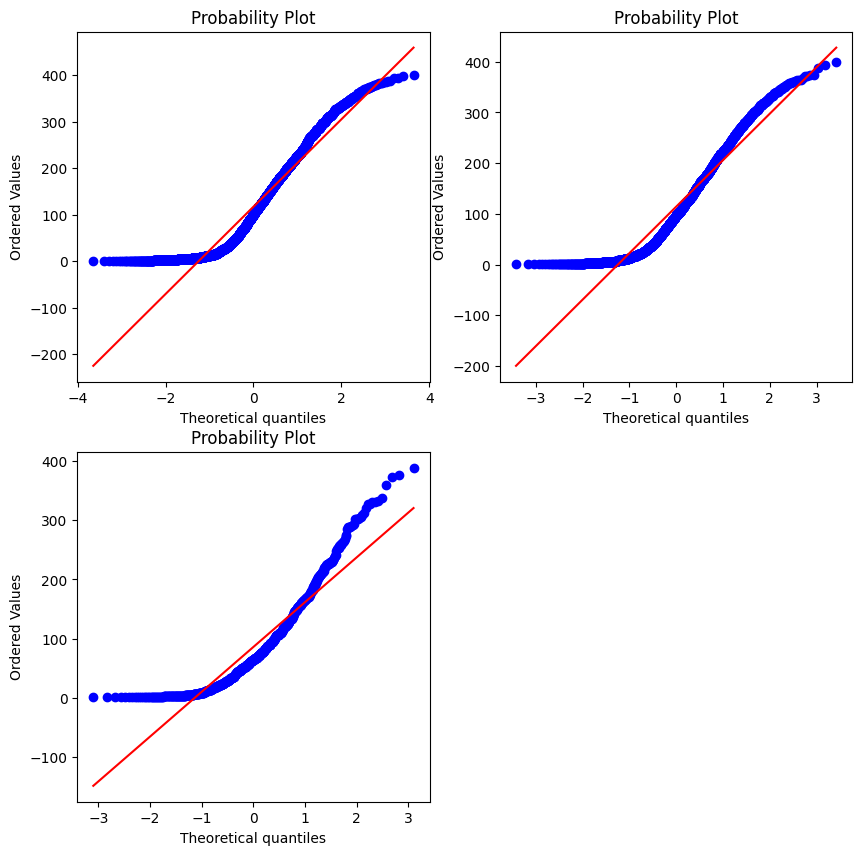

In [ ]:
plt.figure(figsize=(10,10))
weather=[w1,w2,w3]
x=1
for w in weather:
  plt.subplot(2,2,x)
  probplot(x=w['count'], dist='norm', plot=plt)
  x+=1
  plt.plot()

In [ ]:
from scipy.stats import levene
levene(w1['count'], w2['count'], w3['count'])

LeveneResult(statistic=44.72310741378646, pvalue=4.827490144993427e-20)

### Ho: variance is same
### Ha: variance is different
### alpha=0.05, p_value=4.827490144993427e-20
### p<alpha, we reject null hypothesis
### therefore, variance is different

### As the assumptions of ANOVA test fails, we will be using kruskal wallis hypothesis tesing

In [ ]:
from scipy.stats import kruskal

In [ ]:
kruskal(w1['count'], w2['count'], w3['count'])

KruskalResult(statistic=56.2949754243697, pvalue=5.966249447523927e-13)

### alpha=0.05, p_value=5.966249447523927e-13
### p<alpha, we reject null hypothesis
### therefore, demand of bicylces on rent is not the same for different weather conditions

# **Demand of bicycles on rent based on different seasons**

Ho: demand of bicycles is same for different seasons

Ha: demand of bicycles is not same for different seasons

In [ ]:
data_r['season'].value_counts()

season
1    2300
4    2142
2    1889
3    1753
Name: count, dtype: int64

In [ ]:
data['season'].dtypes

CategoricalDtype(categories=[1, 2, 3, 4], ordered=False)

In [ ]:
data['season']=data['season'].astype('int')

In [ ]:
s1=data_r[data_r['season']==1]
s2=data_r[data_r['season']==2]
s3=data_r[data_r['season']==3]
s4=data_r[data_r['season']==4]

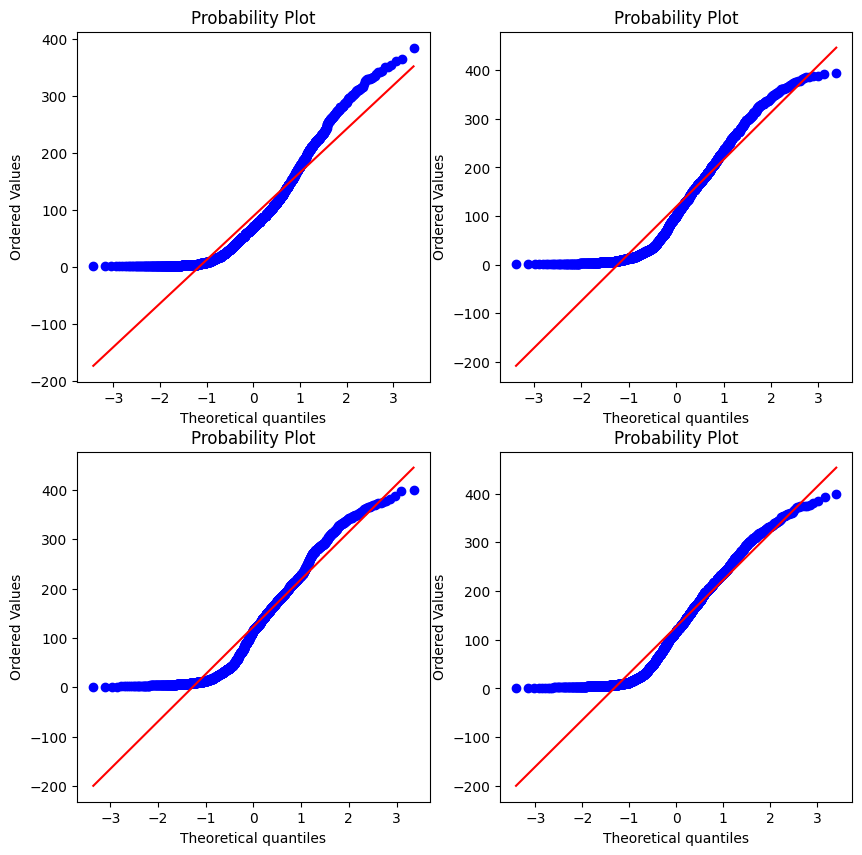

In [ ]:
plt.figure(figsize=(10,10))
seas=[s1,s2,s3,s4]
x=1
for s in seas:
  plt.subplot(2,2,x)
  probplot(x=s['count'], dist='norm', plot=plt)
  x+=1
  plt.plot()

In [ ]:
levene(s1['count'], s2['count'], s3['count'], s4['count'])

LeveneResult(statistic=84.40051769001536, pvalue=9.132624917324387e-54)

### Ho: variance is same
### Ha: variance is different
### alpha=0.05, p_value=9.132624917324387e-54
### p<alpha, we reject null hypothesis
### therefore, variance is different

### As the assumptions of ANOVA test fails, we will be using kruskal wallis hypothesis tesing

In [ ]:
kruskal(s1['count'], s2['count'], s3['count'], s4['count'])

KruskalResult(statistic=189.8923804335085, pvalue=6.439566024515281e-41)

### alpha=0.05, p_value=6.439566024515281e-41
### p<alpha, we reject null hypothesis
### therefore, demand of bicylces on rent is not the same for different seasons

# **Dependency between weather conditions and different seasons**

Ho: weather is independent of season

Ha: weather is dependent of season

In [ ]:
data_r['weather'].dtypes, data_r['season'].dtypes

(dtype('int64'), CategoricalDtype(categories=[1, 2, 3, 4], ordered=False))

### converting weather into categorical data type so that we can use chi-square hypothesis testing

In [ ]:
data['weather']=data['weather'].astype('category')
data['weather'].dtypes

CategoricalDtype(categories=[1, 2, 3, 4], ordered=False)

In [ ]:
cross_table = pd.crosstab(index = data_r['season'], columns = data_r['weather'])
cross_table

weather,1,2,3,4
season,,,,
1,1467,655,177,1
2,1171,530,188,0
3,1210,389,154,0
4,1296,647,199,0


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
chi2_contingency(cross_table)

Chi2ContingencyResult(statistic=45.83550617910554, pvalue=6.46060371830876e-07, dof=9, expected_freq=array([[1.46353290e+03, 6.31902524e+02, 2.04280059e+02, 2.84512618e-01],
       [1.20200594e+03, 5.18984290e+02, 1.67776101e+02, 2.33671450e-01],
       [1.11546660e+03, 4.81619619e+02, 1.55696932e+02, 2.16848095e-01],
       [1.36299456e+03, 5.88493568e+02, 1.90246907e+02, 2.64967838e-01]]))

### alpha=0.05, p_value=6.46060371830876e-07
### p<alpha, hence we reject null hypothesis
### therefore there is a dependency between weather and season

## **Recommendations -**
### 1. as the season has dependency on weather, bicycles wont be the best option for customers during heavy rain, and snow
### 2. yulu can expand their bicycle service to small cities, because small cities and towns have already more shorter distances than large cities. Other than that many communities organizes few event in which they can promote the eco-friendly service by yulu
### 3. Yulu can start scheme, like if yulu provide bicycle on basis of days so they can start a scheme in which if customer takes their bicycle for 2 days then 1 day is free for them yulu won't take any charge.
### 4. unique sound system can be installed in yulu biycles for easy identification and big branding